In [1]:
import psycopg2
from sim_v1analysis_v2_config import local_host, local_name, local_port, local_user, v1_setup_json, simulation_iterations, real_results_sql
from creds import local_db_password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time

from sim_v1 import simulate

warnings.simplefilter('ignore')
conn = psycopg2.connect(dbname=local_name, user =local_user, host=local_host, password=local_db_password, port =local_port)
cur = conn.cursor()

fixture_id = 1035137


In [2]:
real_results_df = pd.read_sql(real_results_sql, conn)

In [3]:

def plot_results(real_df = None, fix_id=None, chart_type=None):
    sim_df = simulate(fix_id, v1_setup_json, simulation_iterations, 'individual')
    row = real_df.loc[real_df['fixture_id']==fix_id]
    actual_diff = row['home_goal'] - row['away_goal']


    buckets = [x + 1 for x in range(-8,7)]
    q1, median, q3 = np.quantile(sim_df['home_goal'] - sim_df['away_goal'], [0.25, 0.5, 0.75])
    plt.hist(sim_df['home_goal'] - sim_df['away_goal'], bins=buckets)
    plt.axvline(q1, color='red', linestyle='dashed', linewidth=1, label='Q1')
    plt.axvline(median, color='green', linestyle='solid', linewidth=2, label='Median')
    plt.axvline(q3, color='orange', linestyle='dashed', linewidth=1, label='Q3')
    plt.axvline(actual_diff.values[0], color='black', linestyle='solid', linewidth=2, label='Q3')
    
    if chart_type == 'hist' or chart_type ==None:
        plt.show()
    plt.clf()

    pivot_table = sim_df.pivot_table(index='home_goal', columns='away_goal', aggfunc='size')


    plt.imshow(pivot_table, cmap='viridis', interpolation='nearest')  # Adjust cmap and interpolation as needed
    plt.xlabel('Away')
    plt.ylabel('Home')
    plt.colorbar(label='Goals')
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            plt.text(j, i, f'{pivot_table.values[i, j] / len(sim_df) *100:0.0f}%',
                    ha="center", va="center", color="white")

    if chart_type == 'heat' or chart_type == None:
        plt.show()
    # print(real_df.loc[real_df['fixture_id']==fix_id])
    print(f"Real Score-- Home: {real_df['home_goal'].loc[real_df['fixture_id']==fix_id].values[0]} || Away: {real_df['away_goal'].loc[real_df['fixture_id']==fix_id].values[0]}")
    # print(f"Quantiles: Q1 - {q1}, Median  - {median}, Q3 - {q3}, Mean - {np.mean(sim_df['home_goal'] - sim_df['away_goal'])}")
    # print(f"median_test = {np.median(sim_df['home_goal'] - sim_df['away_goal'])}")

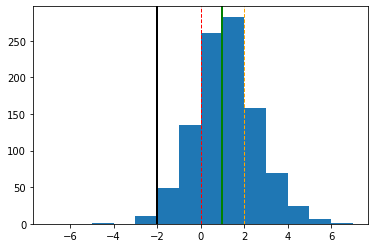

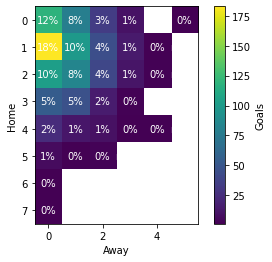

Real Score-- Home: 1 || Away: 3


In [4]:
plot_results(real_results_df, 1035060)

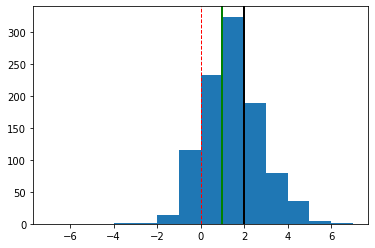

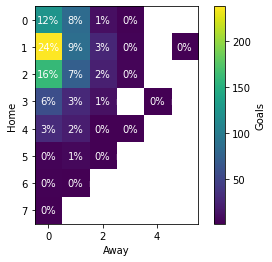

Real Score-- Home: 3 || Away: 1


In [5]:
plot_results(real_results_df, 1035093)